In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import cv2

In [2]:
from tensorflow.keras.utils import to_categorical

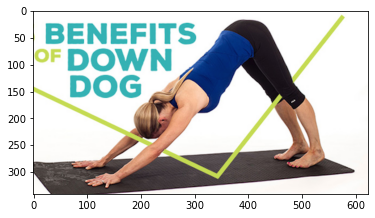

In [17]:
img=image.load_img('/Users/aekanshgupta/Downloads/archive (7)/Adho Mukha Svanasana/File2.png')
plt.imshow(img)

In [9]:
dir_path='/Users/aekanshgupta/Downloads/archive (7)'
import pathlib
data_dir=pathlib.Path(dir_path)
data_dir

PosixPath('/Users/aekanshgupta/Downloads/archive (7)')

In [12]:
a=len(list(data_dir.glob('*/*.png'))) #goes into train directory's each folder and reads every image's path in list
b=len(list(data_dir.glob('*/*.jpg')))
a+b

2355

In [28]:
b=len(list(data_dir.glob('*/*'))) #reads the files of every format not just jpg and png
b

2758

In [29]:
yoga_dict={}
c=0
for i in os.listdir(dir_path):
    if i=='Poses.json' or i=='.DS_Store':
        continue
    c+=1
    yoga_dict[i]=list(data_dir.glob(f'{i}/*'))

In [39]:
img = cv2.imread(str(yoga_dict['Hanumanasana'][0]))
img.shape

(446, 629, 3)

In [134]:
X, Y, Z = [], [], []
c=0
try:
    for pose, images in yoga_dict.items():
        for image in images:
            img = cv2.imread(str(image))
#             print(pose)
            resized_img = cv2.resize(img,(224,224))
            X.append(resized_img)
            Y.append(pose)
            Z.append(c)
        c+=1    
except:
    pass

In [139]:
X=np.array(X) #the images converted to numpy array
Y=np.array(Y) #all the pose names
Z=np.array(Z) #numbering the poses to convert them into integer for y in training

In [128]:
# Y_set=np.unique(Y)

In [129]:
# Y_set

array(['Adho Mukha Svanasana', 'Anjaneyasana', 'Ardha Chandrasana',
       'Ardha Matsyendrasana', 'Ardha Navasana',
       'Ardha Pincha Mayurasana', 'Ashta Chandrasana', 'Baddha Konasana',
       'Bakasana', 'Camatkarasana', 'Garudasana', 'Halasana',
       'Hanumanasana', 'Malasana', 'Navasana', 'Padmasana',
       'Parsva Virabhadrasana', 'Paschimottanasana', 'Phalakasana',
       'Pincha Mayurasana', 'Salamba Bhujangasana',
       'Salamba Sarvangasana', 'Setu Bandha Sarvangasana', 'Sivasana',
       'Supta Kapotasana', 'Trikonasana', 'Upavistha Konasana',
       'Urdhva Dhanurasana', 'Ustrasana', 'Utkatasana', 'Uttanasana',
       'Utthita Hasta Padangusthasana', 'Utthita Parsvakonasana',
       'Vasisthasana', 'Virabhadrasana One', 'Virabhadrasana Three',
       'Vrksasana'], dtype='<U29')

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Z,
    test_size=0.3,
    stratify=Y,
    random_state=42
    )

In [146]:
y_train = to_categorical(y_train)
y_to_check=y_test
y_test = to_categorical(y_test)

In [154]:
outfile = '/Users/aekanshgupta/Movies/yoga/y_to_check'
np.save(outfile, y_to_check)